# Traitement du fichier de données
## Chargement de quelques librairies

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Lecture des données

In [4]:
filename = "Emails_par_jours.csv"

file = open(filename,"r")
data = file.readlines()
Nlines = len(data)
for line in data :
    print(line[0:-1].split(","))

['Date', 'Number of emails', 'Number that require answers']
['2023-08-02', '3', '0']
['2023-08-03', '2', '0']
['2023-08-04', '2', '0']
['2023-08-05', '0', '0']
['2023-08-06', '1', '0']
['2023-08-07', '3', '2']
['2023-08-08', '5', '3']


### Mettre les données dans des tableaux

In [3]:
names = data[0]
names = names[0:-1].split(",")
Ncol = len(names)


datatab = np.zeros((Nlines-1, Ncol),dtype=int)
for i in range(1,Nlines) :
    line = data[i]
    line = line[0:-1].split(",")
    for j in range(Ncol) :
        datatab[i-1,j] = int(line[j])
print(datatab)
year = datatab[:,0]
month = datatab[:,1]
day = datatab[:,2]
Nemail = datatab[:,3]
Nanswer = datatab[:,4]

[[2023    8    2    3    0]
 [2023    8    3    2    0]
 [2023    8    4    2    0]
 [2023    8    5    0    0]
 [2023    8    6    1    0]
 [2023    8    7    3    2]
 [2023    8    8    2    0]]


### Afficher les données

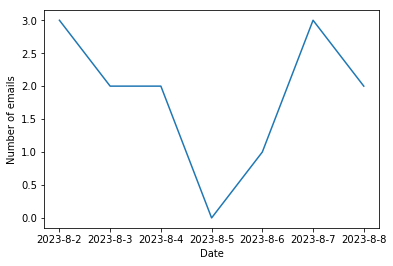

In [4]:
# Redefine Nlines to not take into account name row
Nlines = len(year)

# Create labels for figures
datelabels = []
for i in range(Nlines) :
    yyyy = str(year[i])
    mm = str(month[i])
    dd = str(day[i])
    date_string = yyyy+"-"+mm+"-"+dd
    datelabels.append(date_string)
    
fig, ax = plt.subplots()

I_x = [i for i in range(Nlines)]
ax.plot(I_x,Nemail)
ax.set_xticks(I_x)
ax.set_xticklabels(datelabels)
plt.xlabel("Date")
plt.ylabel("Number of emails")

plt.show()

### Some numbers

#### Mean

In [5]:
np.mean(Nemail)

1.8571428571428572

#### Median

In [7]:
np.median(Nemail)

2.0

## Traitement des données avec pandas

In [9]:
raw_data = pd.read_csv(filename)
raw_data

Date  Number of emails  Number that require answers
0  2023-08-02                 3                            0
1  2023-08-03                 2                            0
2  2023-08-04                 2                            0
3  2023-08-05                 0                            0
4  2023-08-06                 1                            0
5  2023-08-07                 3                            2
6  2023-08-08                 5                            3

In [13]:
date = pd.to_datetime(raw_data['Date'],format='%Y-%m-%d')
raw_data['Date'] = date
data = raw_data.set_index('Date')
data

Number of emails  Number that require answers
Date                                                     
2023-08-02                 3                            0
2023-08-03                 2                            0
2023-08-04                 2                            0
2023-08-05                 0                            0
2023-08-06                 1                            0
2023-08-07                 3                            2
2023-08-08                 5                            3

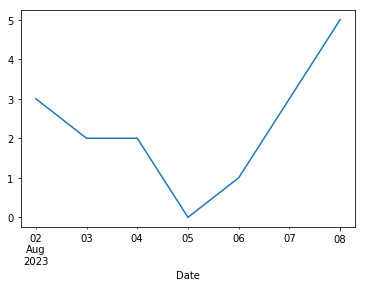

In [14]:
data['Number of emails'].plot()